In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
dataset = pd.read_csv(r"D:\mlops_hotel_booking_pred\archive (1)\booking.csv")

In [18]:
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [19]:
train , test = train_test_split( dataset , test_size=0.2 , train_size=0.8 , random_state=42)

In [20]:
train

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,INN00388,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,INN07769,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,INN11793,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,INN07979,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,INN10671,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,INN16851,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,Offline,0,0,0,55.0,2,12/26/2017,Not_Canceled
6265,INN06266,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,Online,0,0,0,80.0,0,10/16/2017,Canceled
11284,INN11285,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,Corporate,0,0,0,110.0,1,5/24/2018,Not_Canceled
860,INN00861,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,Online,0,0,0,130.0,0,6/7/2018,Canceled


In [21]:
test

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36238,INN36239,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,11/10/2018,Canceled
83,INN00084,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,3/14/2018,Not_Canceled
23449,INN23450,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,6/22/2018,Not_Canceled
14981,INN14982,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,Online,0,0,0,1.00,0,2/28/2018,Not_Canceled
18392,INN18393,2,0,1,0,Meal Plan 1,0,Room_Type 1,141,Offline,0,0,0,90.00,0,9/20/2017,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19588,INN19589,2,0,0,2,Meal Plan 1,0,Room_Type 4,186,Online,0,0,0,118.80,1,8/10/2018,Canceled
5010,INN05011,2,0,0,1,Not Selected,0,Room_Type 1,12,Online,0,0,0,79.00,0,2/23/2018,Canceled
9986,INN09987,2,0,2,4,Meal Plan 1,0,Room_Type 1,28,Online,0,0,0,131.60,0,4/29/2018,Canceled
33253,INN33254,2,0,0,1,Not Selected,0,Room_Type 1,2,Online,0,0,0,81.00,0,1/26/2018,Not_Canceled


In [22]:
train.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='str')

In [26]:
train.drop(columns=["Booking_ID"] , inplace=True)

In [27]:
train.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled


In [30]:
train.isna().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [31]:
train.duplicated().sum()

np.int64(7699)

In [32]:
train.drop_duplicates(inplace=True)

In [33]:
train.shape

(21329, 16)

In [35]:
train.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='str')

In [36]:
train["number of adults"].value_counts()

number of adults
2    15487
1     3990
3     1726
0      114
4       12
Name: count, dtype: int64

In [38]:
train["number of children"].value_counts()

number of children
0     19225
1      1231
2       857
3        13
9         2
10        1
Name: count, dtype: int64

In [39]:
train["number of week nights"].value_counts()

number of week nights
2     5929
1     5796
3     4640
4     1972
0     1460
5     1170
6      138
7       78
8       46
10      40
9       25
11      10
15       8
12       7
14       4
13       3
17       2
16       1
Name: count, dtype: int64

In [41]:
train["number of weekend nights"].value_counts()

number of weekend nights
0    9118
1    6078
2    5897
3     116
4      86
5      20
6      13
7       1
Name: count, dtype: int64

In [42]:
train["type of meal"].value_counts()

type of meal
Meal Plan 1     16775
Not Selected     3592
Meal Plan 2       957
Meal Plan 3         5
Name: count, dtype: int64

In [43]:
train["lead time"].value_counts()

lead time
0      933
1      697
2      476
3      456
4      452
      ... 
311      1
355      1
333      1
350      1
331      1
Name: count, Length: 349, dtype: int64

In [44]:
train["average price"].value_counts()

average price
65.00     420
0.00      388
75.00     341
85.00     281
95.00     271
         ... 
116.62      1
114.66      1
159.08      1
79.85       1
127.15      1
Name: count, Length: 3500, dtype: int64

In [45]:
train["booking status"].value_counts()

booking status
Not_Canceled    15210
Canceled         6119
Name: count, dtype: int64

DATA IS QUIET IMBALANCED

In [46]:
train.columns


Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'type of meal', 'car parking space',
       'room type', 'lead time', 'market segment type', 'repeated', 'P-C',
       'P-not-C', 'average price', 'special requests', 'date of reservation',
       'booking status'],
      dtype='str')

In [47]:
categorical_cols = [
    "type of mean" , "car parking space" , "room type" , "market segment type" , "repeated" , "booking status" 
]

In [49]:
numerical_cols = [
    "number of adults" , "number of children" , "number of weekend nights" , "number of week nights" , "lead time" , "average price" , "P-C" , "P-not-C"
]

DATA ANALYSIS

In [51]:
df_copy = train.copy()

In [52]:
df_copy.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
387,3,0,1,3,Meal Plan 1,0,Room_Type 4,155,Online,0,0,0,115.6,1,12/26/2018,Canceled
7768,1,0,2,2,Meal Plan 1,0,Room_Type 4,48,Online,0,0,0,149.4,0,9/18/2018,Canceled
11792,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,Offline,0,0,0,89.0,0,11/4/2018,Canceled
7978,1,0,0,2,Meal Plan 1,0,Room_Type 1,102,Online,0,0,0,86.4,2,12/6/2018,Canceled
10670,2,2,1,2,Meal Plan 1,0,Room_Type 6,9,Online,0,0,0,221.0,0,6/10/2018,Canceled


UNIVARIATE ANALYSIS

In [53]:
def num_plot_dist(train , numerical_cols):
    fig , axes = plt.subplots(len(numerical_cols) , 2 , figsize=(15 , len( numerical_cols)*5))
    if len(numerical_cols) == 1:
        axes = [axes]
    for i  , column in enumerate(numerical_cols):
        sns.histplot( data = train , x = column , ax = axes[i][0] , kde=True , palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot( data = train , x  = column , ax = axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box plot for {column}")


    plt.tight_layout()
    plt.show()

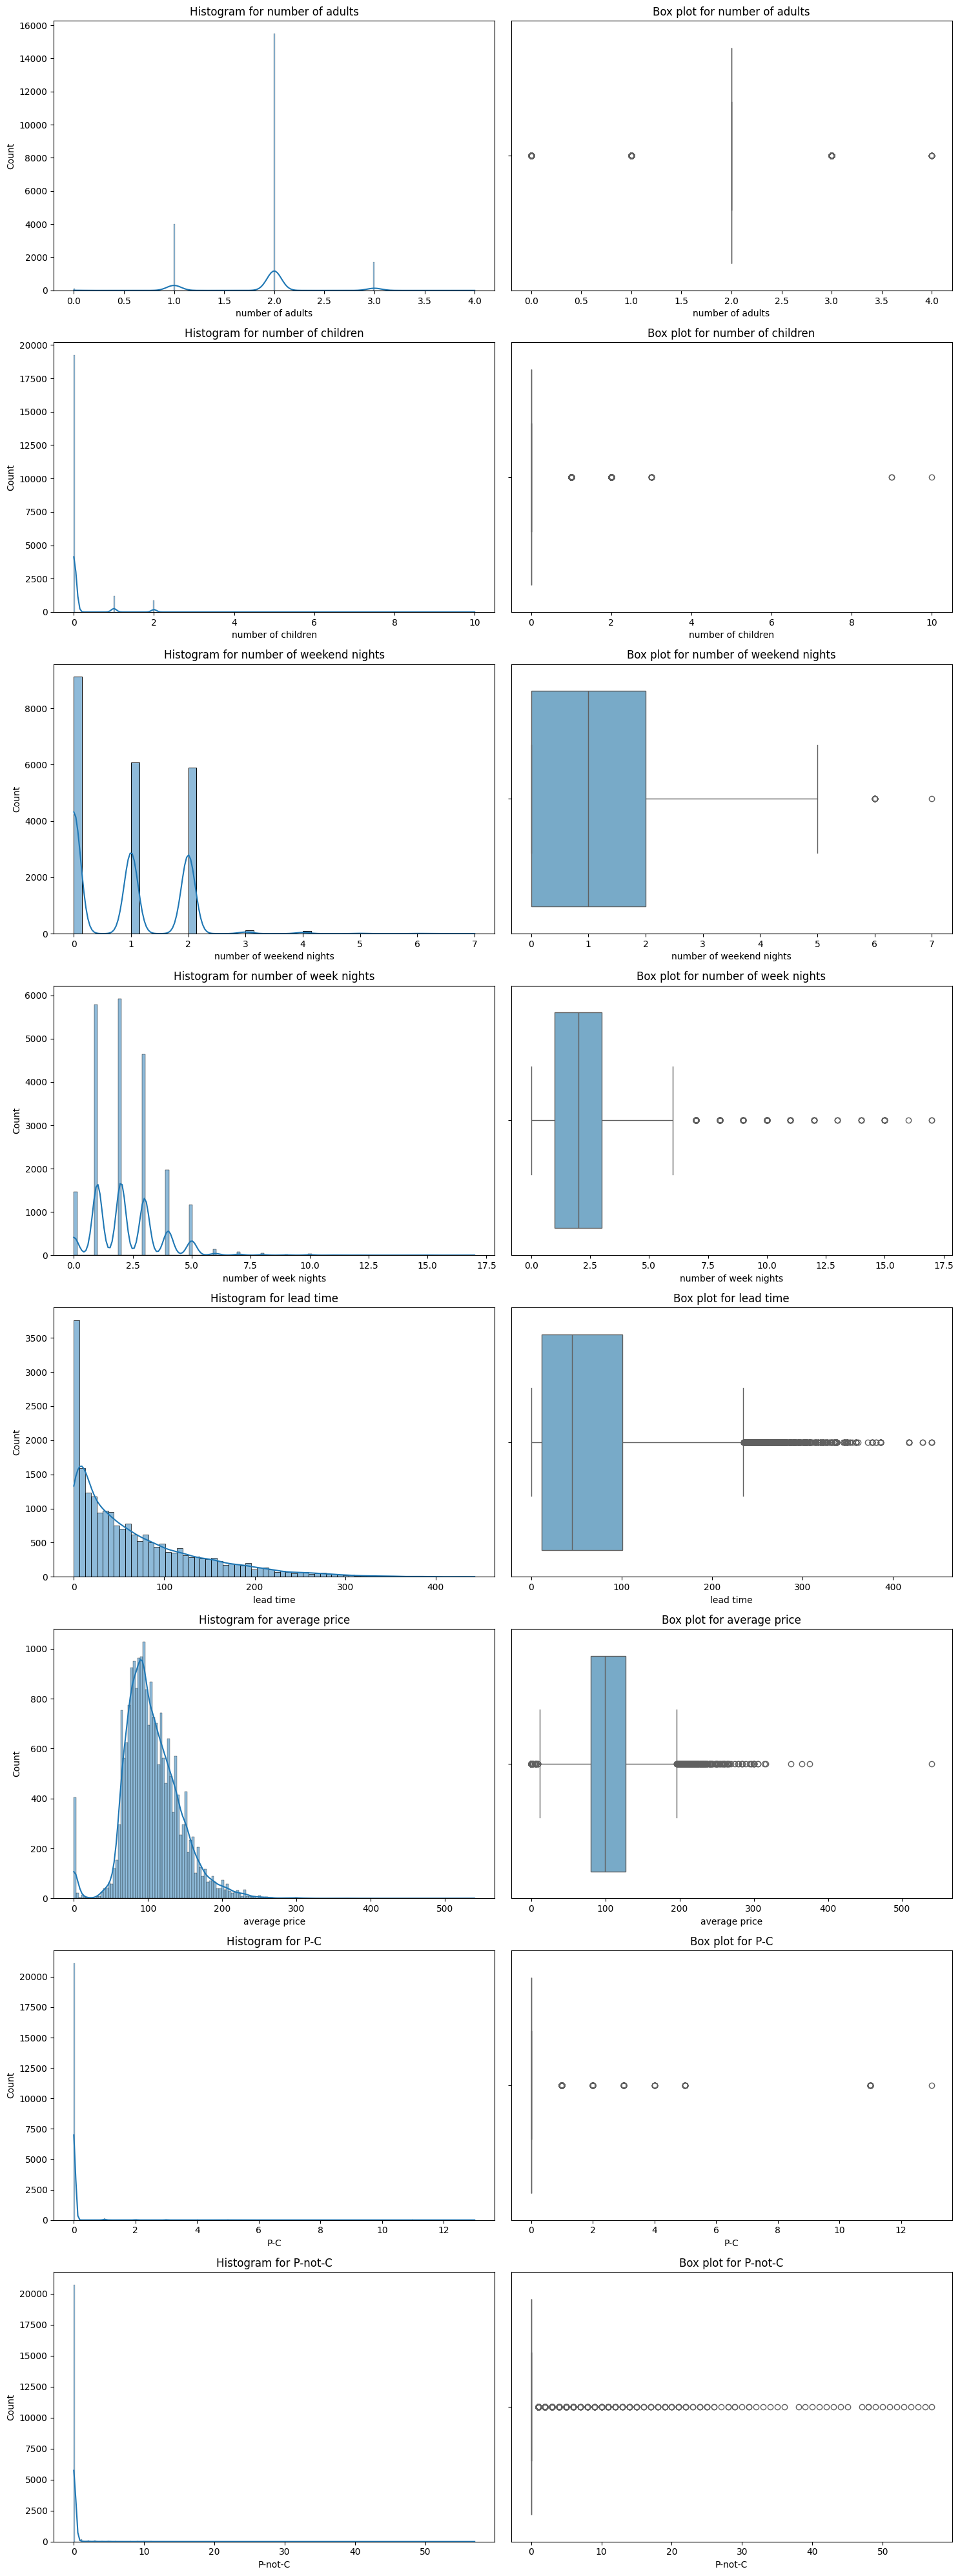

In [54]:
num_plot_dist(df_copy , numerical_cols=numerical_cols)